In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from ts_tools import *

In [3]:
#load train
store_sales = pd.read_csv(
    'input_data/train.csv',
    usecols=['store_nbr', 'family', 'date', 'sales', 'onpromotion'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
        'onpromotion': 'uint32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)
store_sales['date'] = store_sales.date.dt.to_period('D')
store_sales = store_sales.set_index('date').sort_index()

#load test
test = pd.read_csv(
    'input_data/test.csv',
    usecols=['store_nbr', 'family', 'date', 'onpromotion'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'onpromotion': 'uint32',
    },
    parse_dates=['date'],
    infer_datetime_format=True
)
test['date'] = test.date.dt.to_period('D')
test = test.set_index('date').sort_index()

In [4]:
full = pd.concat([store_sales, test])

In [5]:
full['day'] = full.index.day_of_week
full['week'] = full.index.week
full['month'] = full.index.month
full['year'] = full.index.year

## Look at the data

In [6]:
#Look at the data
fl = full.loc[full.store_nbr == '1']
fl = fl.loc['2015']
fl = fl.groupby(['date', 'family'])['sales'].sum().unstack('family')

In [7]:
cols = fl.columns

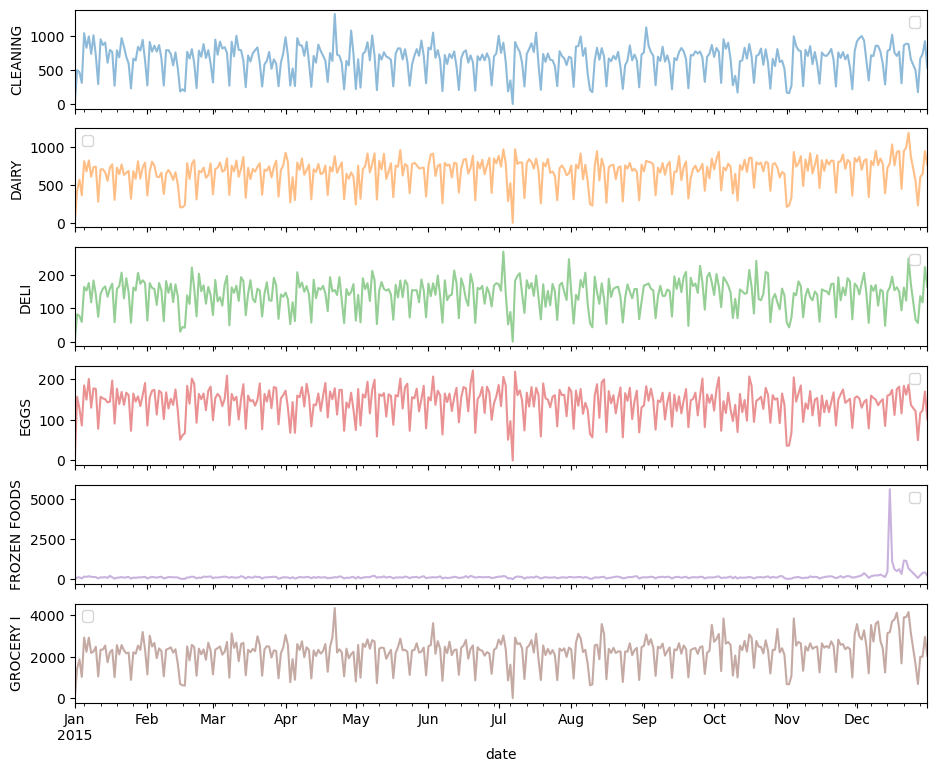

In [8]:
axs = fl.loc[:, cols[7:13]].plot(
    subplots=True, sharex=True, figsize=(11, 9), alpha=0.5,
)
for ax, family in zip(axs, cols[7:13]):
    ax.legend([])
    ax.set_ylabel(family)

## Seasonal plot

In [9]:
fl = full.loc[full.store_nbr == '1']
fl = fl.loc['2015']

#### Check for weekly cycles

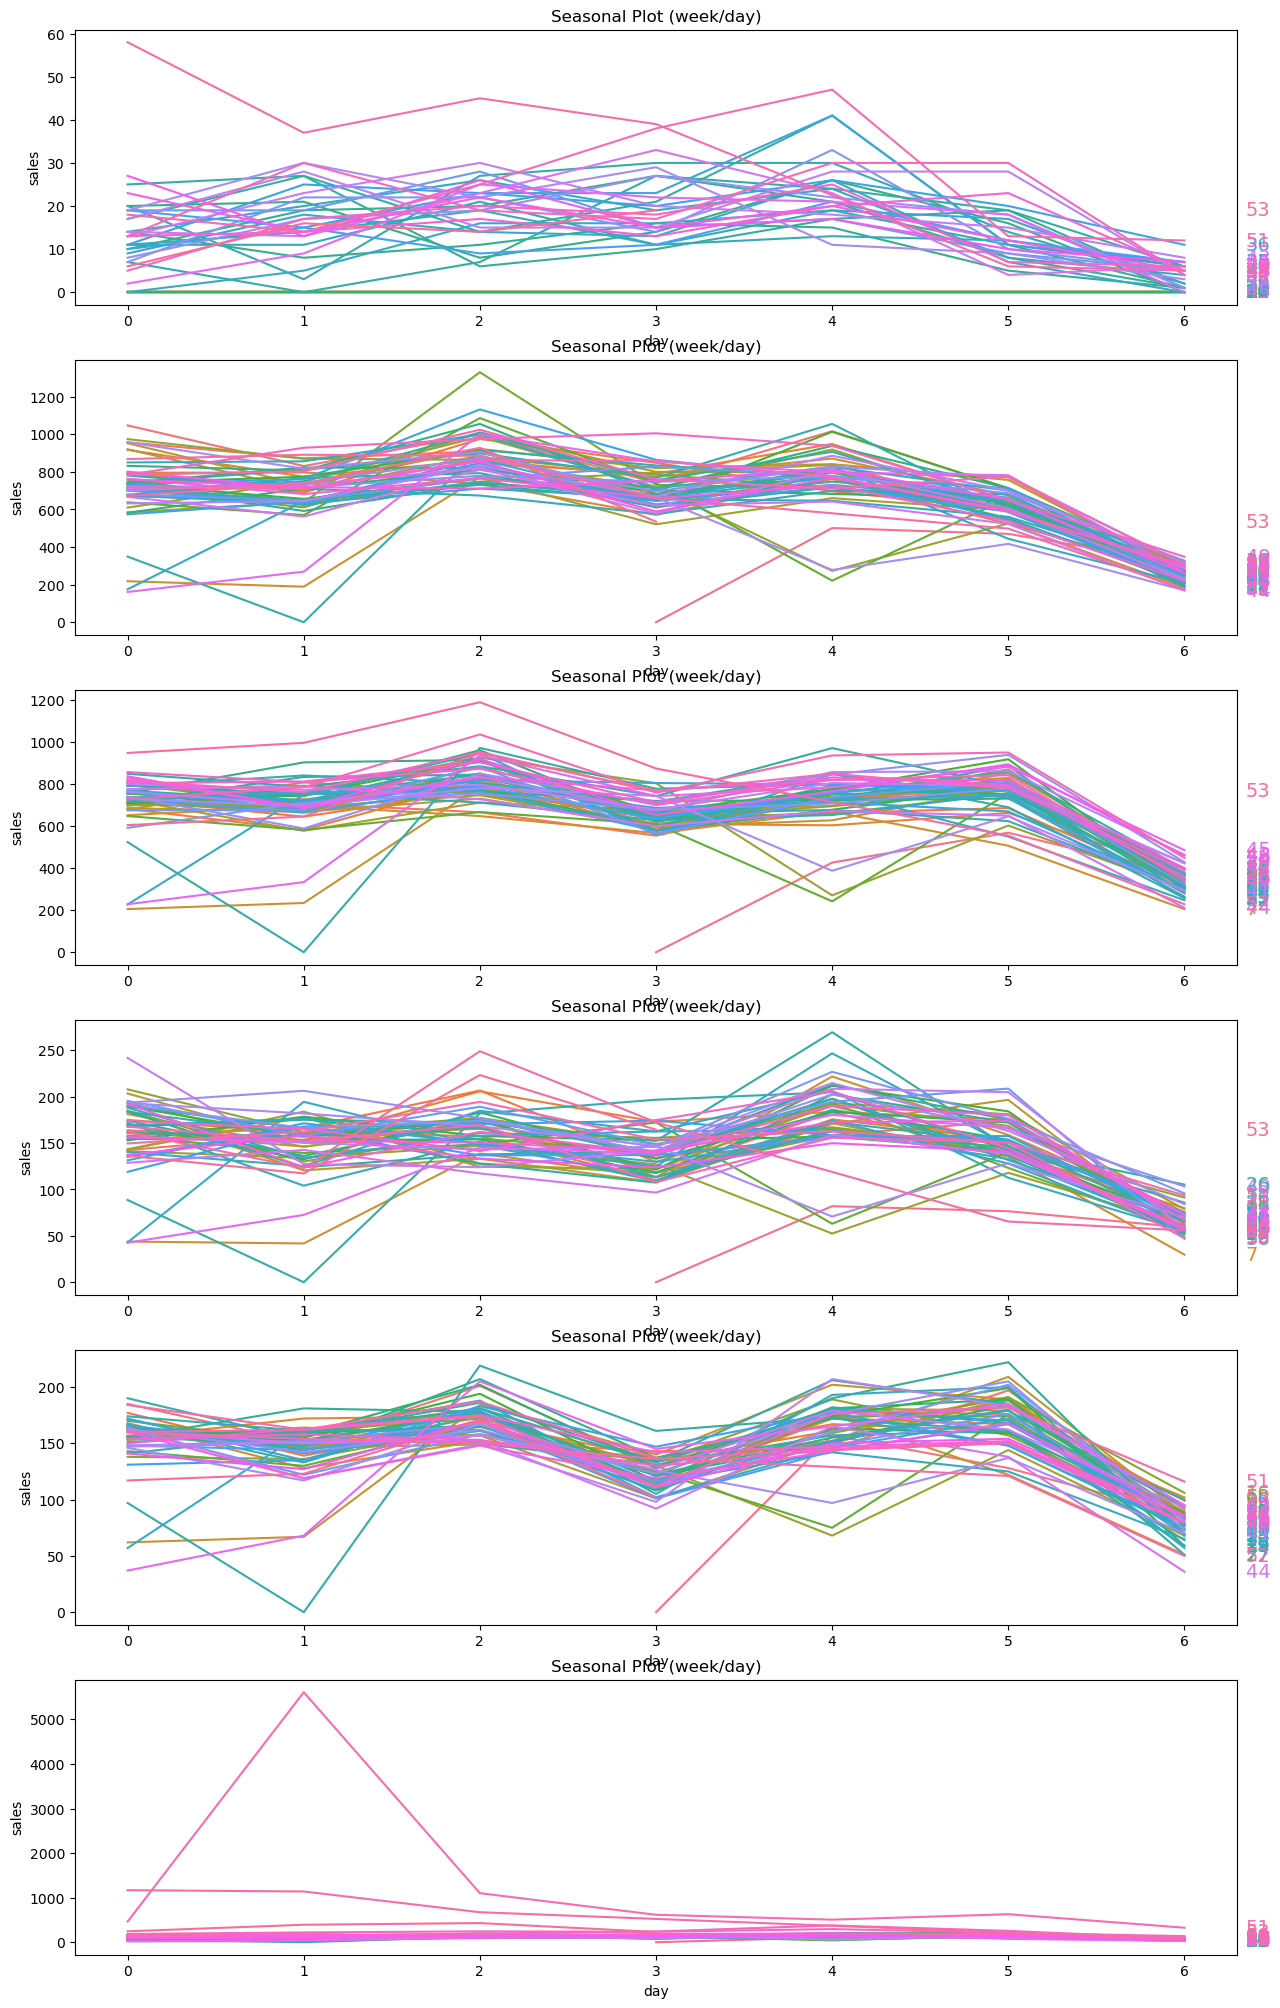

In [11]:
fig, axes = plt.subplots(6, 1, figsize = (15,25))
for n, ax in enumerate(fig.get_axes()):
    seasonal_plot(X = fl.loc[fl.family == cols[n+6], ['week', 'day']],
                  y = fl.loc[fl.family == cols[n+6], 'sales'], period = 'week', freq = 'day', ax=ax)
plt.show()

###### `We can easily recognize weekly cycles`

In [13]:
fl = full.loc[full.store_nbr == '1']

#### Check for yearly cycles

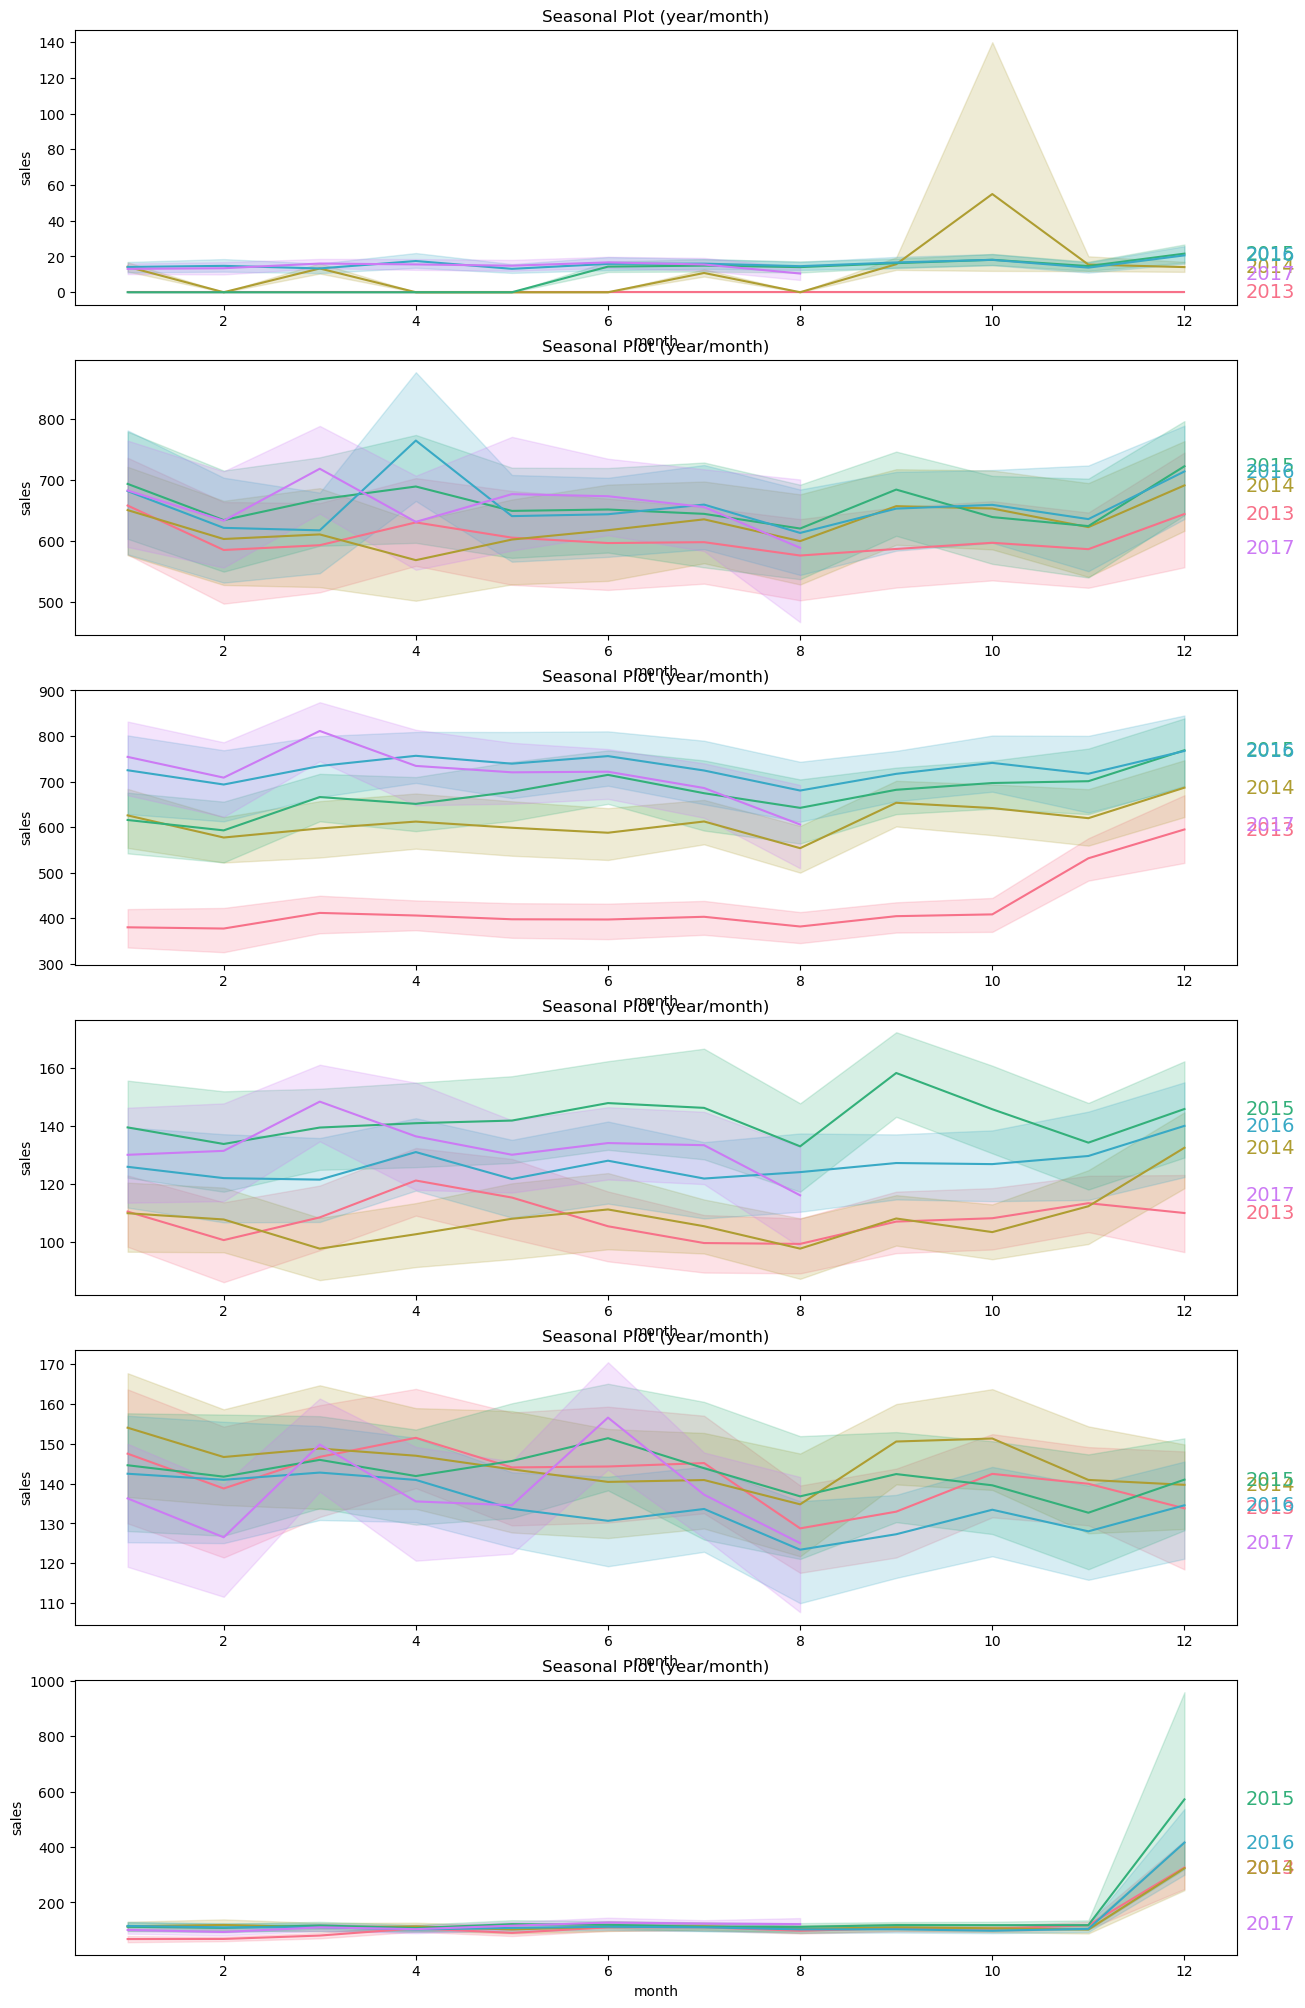

In [14]:
fig, axes = plt.subplots(6, 1, figsize = (15,25))
for n, ax in enumerate(fig.get_axes()):
    seasonal_plot(X = fl.loc[fl.family == cols[n+6], ['year', 'month']],
                  y = fl.loc[fl.family == cols[n+6], 'sales'], period = 'year', freq = 'month', ax=ax)
plt.show()

###### `In some cases there're yearly cycles`

#### Periodigram

<AxesSubplot: title={'center': 'Periodogram'}, ylabel='Variance'>

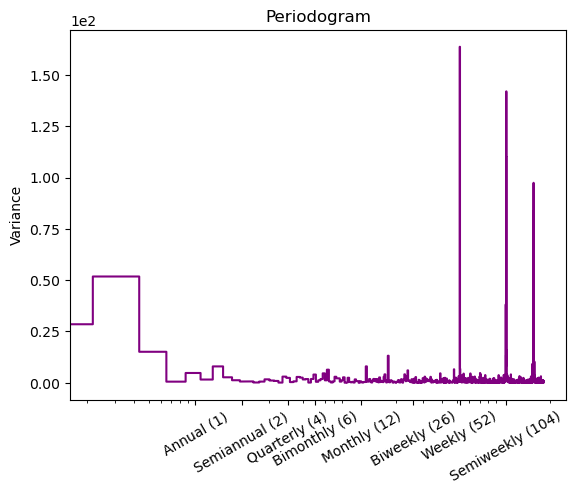

In [26]:
plot_periodogram(fl.loc[fl.family == cols[9], 'sales'].dropna())

###### `There're biweekly cycles also (maybe due to salaries on 15th and 30th)`